## 1. Initial data review

In [70]:
# Importing all libraries required for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [78]:
# Reading data file for UNICEF project
stud_math = pd.read_csv('stud_math.xls')

In [79]:
# Analysing all data set column names and displaying data for the first 10 records
print(stud_math.columns)
display(stud_math.head(10))

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [80]:
# Analysing all dataset column information
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

## 2. Primary column data analysis

In [9]:
# Alnalysing how many schools take part in the program
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


In [81]:
# As this information will not help for the further analysis - delete it from the dataset
stud_math.drop(['school'], inplace = True, axis = 1)
# There is no column 'studytime,granular' in dataset description - delete it from dataset
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)

In [82]:
# Get all statistical infor for each column
stud_math.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,392.0,2.750000,1.098127,0.0,2.0,3.0,4.0,4.0
Fedu,371.0,2.614555,2.228732,0.0,2.0,2.0,3.0,40.0
traveltime,367.0,1.438692,0.694181,1.0,1.0,1.0,2.0,4.0
studytime,388.0,2.038660,0.842078,1.0,1.0,2.0,2.0,4.0
failures,373.0,0.337802,0.743135,0.0,0.0,0.0,0.0,3.0
famrel,368.0,3.937500,0.927277,-1.0,4.0,4.0,5.0,5.0
freetime,384.0,3.231771,0.993940,1.0,3.0,3.0,4.0,5.0
goout,387.0,3.105943,1.115896,1.0,2.0,3.0,4.0,5.0
health,380.0,3.531579,1.396019,1.0,3.0,4.0,5.0,5.0


In [14]:
# Defining 2 functions to replace:
# NaN values for numeric attributes with median value
# NaN values for string attributes with mode value
def nan_to_median(num_col):
    median = num_col.median(skipna = True)
    return num_col.fillna(median, inplace=True)

def nan_to_mode(obj_col): 
    mode = obj_col.mode()
    return obj_col.fillna(mode[0], inplace=True)

Analysing the rest of columns

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
sex    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


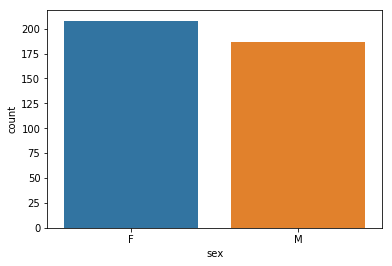

In [19]:
display(pd.DataFrame(stud_math.sex.value_counts()))
stud_math.loc[:, ['sex']].info()
sns.countplot(stud_math.sex)

Chart displays data sample contains a bit more female respondents than male. The column contains clean non-null data (with only expected values - F or M)

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    395 non-null int64
dtypes: int64(1)
memory usage: 3.2 KB


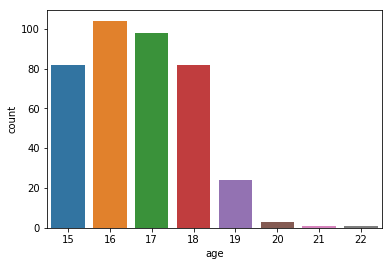

In [23]:
display(pd.DataFrame(stud_math.age.value_counts()))
stud_math.loc[:, ['age']].info()
sns.countplot(stud_math.age)

Chart displays data sample contains majority of students at the age between 15 and 19 years. The column contains clean non-null data (with only expected values - from 15 till 22)

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
address    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


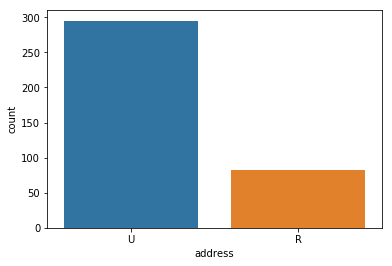

In [24]:
display(pd.DataFrame(stud_math.address.value_counts()))
stud_math.loc[:, ['address']].info()
sns.countplot(stud_math.address)

Chart displays raw data sample contains majority of students living in city. The column contains null data to be replaced with mode

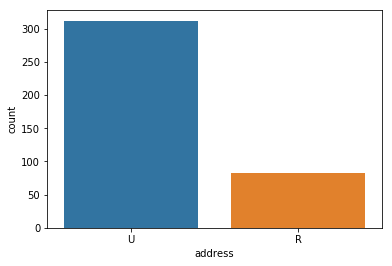

In [27]:
#Replacing NaN values with mode
nan_to_mode(stud_math.address)
sns.countplot(stud_math.address)

Having in mind common information by each column let's clean up the dataset before analysing if necessary

,famsize
GT3,288
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsize    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


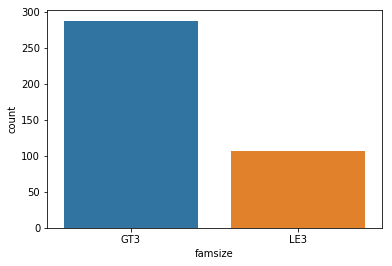

In [29]:
display(pd.DataFrame(stud_math.famsize.value_counts()))
stud_math.loc[:, ['famsize']].info()
sns.countplot(stud_math.famsize)

Chart displays data sample contains majority of students belonging to the families of greather than 3 members. The column contains clean non-null data (with only expected values - GT3 and LE3)

,Pstatus
T,359
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


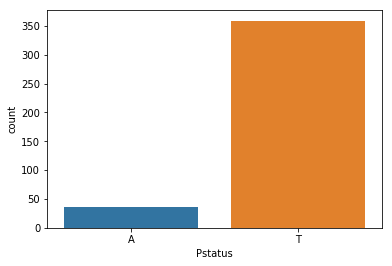

In [31]:
nan_to_mode(stud_math.Pstatus)
display(pd.DataFrame(stud_math.Pstatus.value_counts()))
stud_math.loc[:, ['Pstatus']].info()
sns.countplot(stud_math.Pstatus)

Chart displays data sample contains majority of students belonging to the families where the parents live together. The column contained null data replaced with mode the rest vlalues are as expected - A or T)

,Medu
4.0,134
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


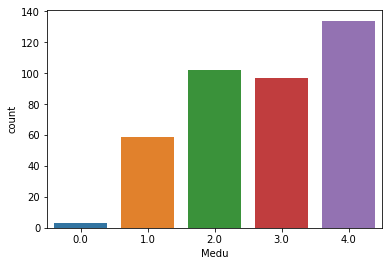

In [34]:
display(pd.DataFrame(stud_math.Medu.value_counts()))
stud_math.loc[:, ['Medu']].info()
sns.countplot(stud_math.Medu)

Chart displays data sample contains majority of students'mothers is educated (mostly high education). The column contains clean non-null data (with only expected values - from 0 to 4)

,Fedu
2.0,130
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


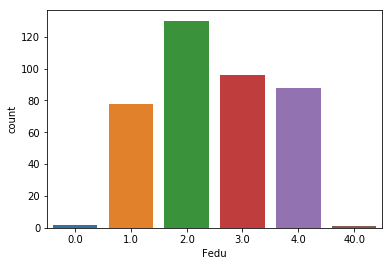

In [37]:
nan_to_median(stud_math.Fedu)
display(pd.DataFrame(stud_math.Fedu.value_counts()))
stud_math.loc[:, ['Fedu']].info()
sns.countplot(stud_math.Fedu)

Chart displays data sample contains majority of students' fathers are educated (mostly secondary school). The column contained null data replaced with mode the rest vlalues are as expected - from 0 to 4 except value of 40 - it's a data issue, to be raplaced with '4' logically)

,Fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


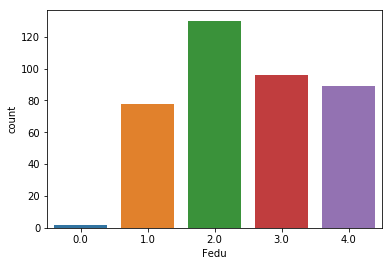

In [39]:
stud_math.Fedu= stud_math.Fedu.replace(40,4)
display(pd.DataFrame(stud_math['Fedu'].value_counts()))
sns.countplot(stud_math.Fedu)

,Mjob
other,152
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


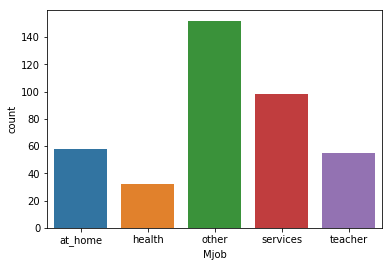

In [41]:
nan_to_mode(stud_math.Mjob)
display(pd.DataFrame(stud_math.Mjob.value_counts()))
stud_math.loc[:, ['Mjob']].info()
sns.countplot(stud_math.Mjob)

,Fjob
other,233
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


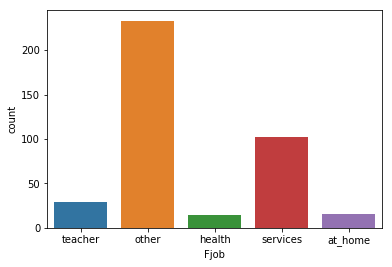

In [43]:
nan_to_mode(stud_math.Fjob)
display(pd.DataFrame(stud_math.Fjob.value_counts()))
stud_math.loc[:, ['Fjob']].info()
sns.countplot(stud_math.Fjob)

Charts display data sample contains majority of students' fathers and mothers work in Other area. The column contained null data replaced with mode.

,reason
course,154
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


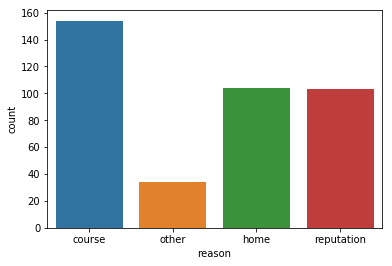

In [45]:
nan_to_mode(stud_math.reason)
display(pd.DataFrame(stud_math.reason.value_counts()))
stud_math.loc[:, ['reason']].info()
sns.countplot(stud_math.reason)

Chart displays data sample contains majority of students' school choice is based on educational course. The column contained null data replaced with mode.

,guardian
mother,281
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


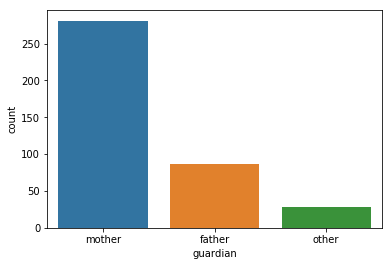

In [48]:
display(pd.DataFrame(stud_math.guardian.value_counts()))
stud_math.loc[:, ['guardian']].info()
sns.countplot(stud_math.guardian)

Chart displays data sample contains majority of students' quardian is a mother. The column contains clean non-null data (with only expected values)

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


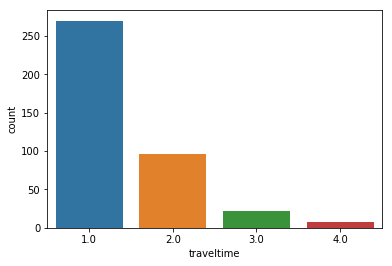

In [51]:
nan_to_median(stud_math.traveltime)
display(pd.DataFrame(stud_math.traveltime.value_counts()))
stud_math.loc[:, ['traveltime']].info()
sns.countplot(stud_math.traveltime)

Chart displays for majority of students it takes less than 15 min to get school. The column contained null data replaced with median.

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


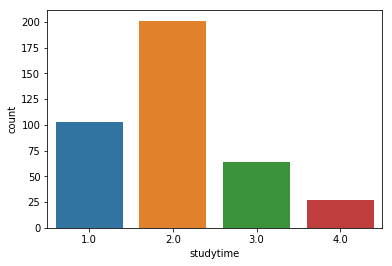

In [54]:
display(pd.DataFrame(stud_math.studytime.value_counts()))
stud_math.loc[:, ['studytime']].info()
sns.countplot(stud_math.studytime)

Chart displays data sample contains majority of students spend 2-5 per day for learning after school. The column contains clean non-null data (with only expected values)

,failures
0.0,315
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


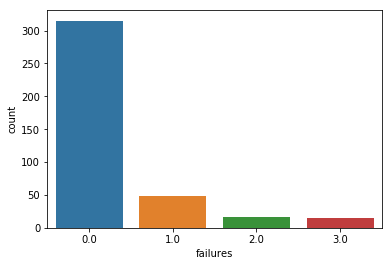

In [56]:
nan_to_median(stud_math.failures)
display(pd.DataFrame(stud_math.failures.value_counts()))
stud_math.loc[:, ['failures']].info()
sns.countplot(stud_math.failures)

Chart displays data sample contains majority of students has no failures. The column contained null data replaced with median.

,schoolsup
no,344
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


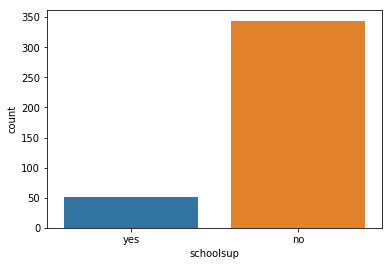

In [58]:
nan_to_mode(stud_math.schoolsup)
display(pd.DataFrame(stud_math.schoolsup.value_counts()))
stud_math.loc[:, ['schoolsup']].info()
sns.countplot(stud_math.schoolsup)

Chart displays data sample contains majority of students with no additional educational support. The column contained null data replaced with mode.

,famsup
yes,258
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsup    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


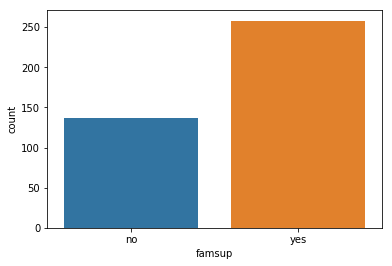

In [61]:
nan_to_mode(stud_math.famsup)
display(pd.DataFrame(stud_math.famsup.value_counts()))
stud_math.loc[:, ['famsup']].info()
sns.countplot(stud_math.famsup)

Chart displays data sample contains majority of students with family educational support. The column contained null data replaced with mode.

,paid
no,240
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
paid    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


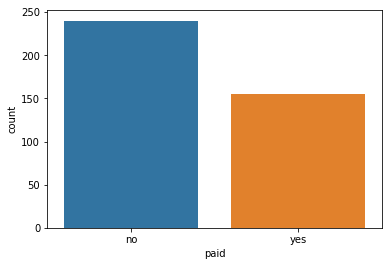

In [64]:
nan_to_mode(stud_math.paid)
display(pd.DataFrame(stud_math.paid.value_counts()))
stud_math.loc[:, ['paid']].info()
sns.countplot(stud_math.paid)

Chart displays data sample contains majority of students with no additional paid math educational courses The column contained null data replaced with mode.

,activities
yes,209
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
activities    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


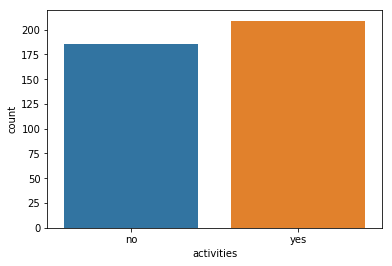

In [66]:
nan_to_mode(stud_math.activities)
display(pd.DataFrame(stud_math.activities.value_counts()))
stud_math.loc[:, ['activities']].info()
sns.countplot(stud_math.activities)

Chart displays data sample contains approximately the same number of students with/without additional math after school courses. The column contained null data replaced with mode.

,nursery
yes,316
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
nursery    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


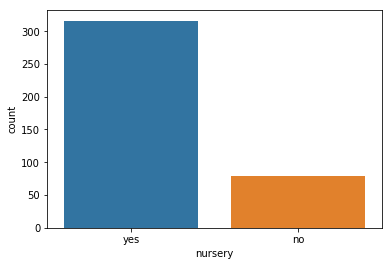

In [68]:
nan_to_mode(stud_math.nursery)
display(pd.DataFrame(stud_math.nursery.value_counts()))
stud_math.loc[:, ['nursery']].info()
sns.countplot(stud_math.nursery)

Chart displays data sample contains the students who mostly went to kindergarten. The column contained null data replaced with mode.

,higher
yes,376
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
higher    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


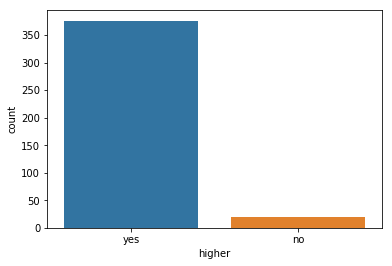

In [84]:
nan_to_mode(stud_math.higher)
display(pd.DataFrame(stud_math.higher.value_counts()))
stud_math.loc[:, ['higher']].info()
sns.countplot(stud_math.higher)

Chart displays data sample contains almost all students willing for higher education. The column contained null data replaced with mode.

,internet
yes,339
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
internet    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


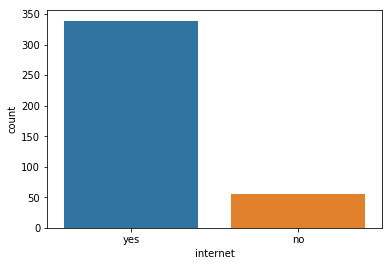

In [88]:
nan_to_mode(stud_math.internet)
display(pd.DataFrame(stud_math.internet.value_counts()))
stud_math.loc[:, ['internet']].info()
sns.countplot(stud_math.internet)

Chart displays data sample contains the majority of students who has an Internet at home. The column contained null data replaced with mode.

,romantic
no,271
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
romantic    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


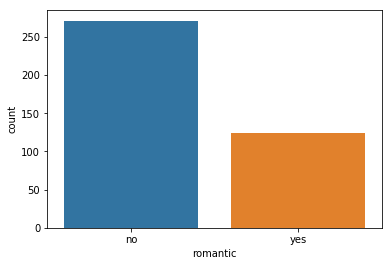

In [91]:
display(pd.DataFrame(stud_math.romantic.value_counts()))
stud_math.loc[:, ['romantic']].info()
sns.countplot(stud_math.romantic)

Chart displays data sample contains amlost one third of students who are in relationship. The column contained clean data with only expected values (yes/no)

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    368 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


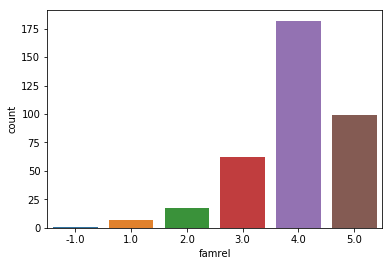

In [92]:
display(pd.DataFrame(stud_math.famrel.value_counts()))
stud_math.loc[:, ['famrel']].info()
sns.countplot(stud_math.famrel)

We can see inproper value in this column (-1). Logically i should be replaced with 1 and then NaN values - with median.

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


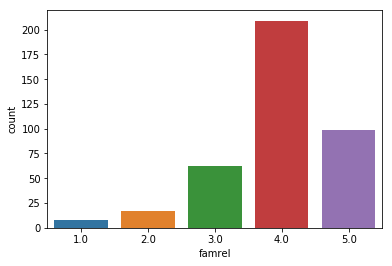

In [97]:
stud_math.famrel = stud_math.famrel.replace(-1,1)
nan_to_median(stud_math.famrel)
display(pd.DataFrame(stud_math['famrel'].value_counts()))
sns.countplot(stud_math.famrel)

Chart displays data sample contains mostly students with good family relationships.

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


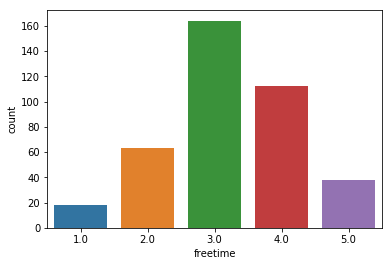

In [99]:
nan_to_median(stud_math.freetime)
display(pd.DataFrame(stud_math['freetime'].value_counts()))
stud_math.loc[:, ['freetime']].info()
sns.countplot(stud_math.freetime)

Chart displays data sample contains mostly students average freetime numbers.

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


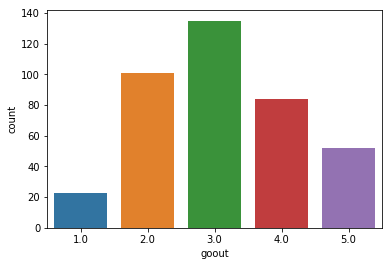

In [102]:
display(pd.DataFrame(stud_math['goout'].value_counts()))
stud_math.loc[:, ['goout']].info()
sns.countplot(stud_math.goout)

Chart displays data sample contains mostly students spend not much time with friends.

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


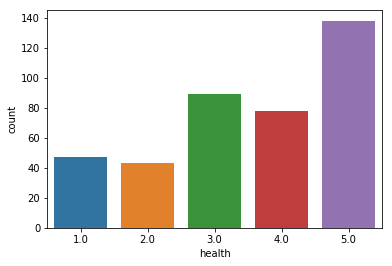

In [105]:
nan_to_median(stud_math.health)
display(pd.DataFrame(stud_math['health'].value_counts()))
stud_math.loc[:, ['health']].info()
sns.countplot(stud_math.health)

Chart displays data sample contains mostly students with good health.

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


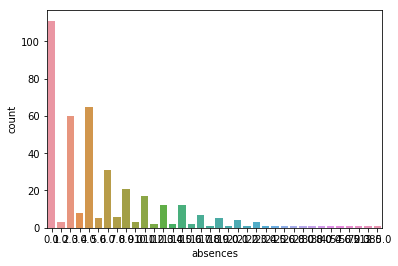

In [106]:
nan_to_median(stud_math.absences)
display(pd.DataFrame(stud_math['absences'].value_counts()))
stud_math.loc[:, ['absences']].info()
sns.countplot(stud_math.absences)

We can see students don't miss school, we can assume this column has outliers.

25-th percentile: 0.0, 75-th percentile: 8.0, IQR: 8.0,  Outlier borders: [-12.0, 20.0].


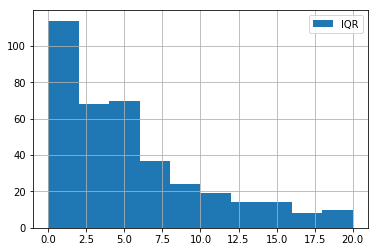

In [107]:
# Defining 25 and 75 percentile for the column to define extremely high and extremely low column values
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-th percentile: {},'.format(perc25), '75-th percentile: {},'.format(perc75), "IQR: {}, ".format(IQR), "Outlier borders: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 20), label = 'IQR')
 
plt.legend();

In [114]:
# Filtering the data
stud_math = stud_math.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 1 columns):
absences    378 non-null float64
dtypes: float64(1)
memory usage: 5.9 KB


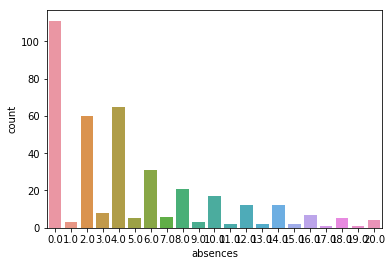

In [115]:
nan_to_median(stud_math.absences)
display(pd.DataFrame(stud_math['absences'].value_counts()))
stud_math.loc[:, ['absences']].info()
sns.countplot(stud_math.absences)

,score
50.0,54
55.0,48
0.0,37
75.0,33
60.0,31
65.0,30
40.0,28
70.0,27
45.0,23
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 1 columns):
score    378 non-null float64
dtypes: float64(1)
memory usage: 15.9 KB


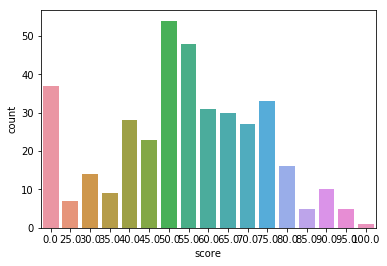

In [118]:
nan_to_median(stud_math.score)
display(pd.DataFrame(stud_math['score'].value_counts()))
stud_math.loc[:, ['score']].info()
sns.countplot(stud_math.score)

## 3. Correlation analysis

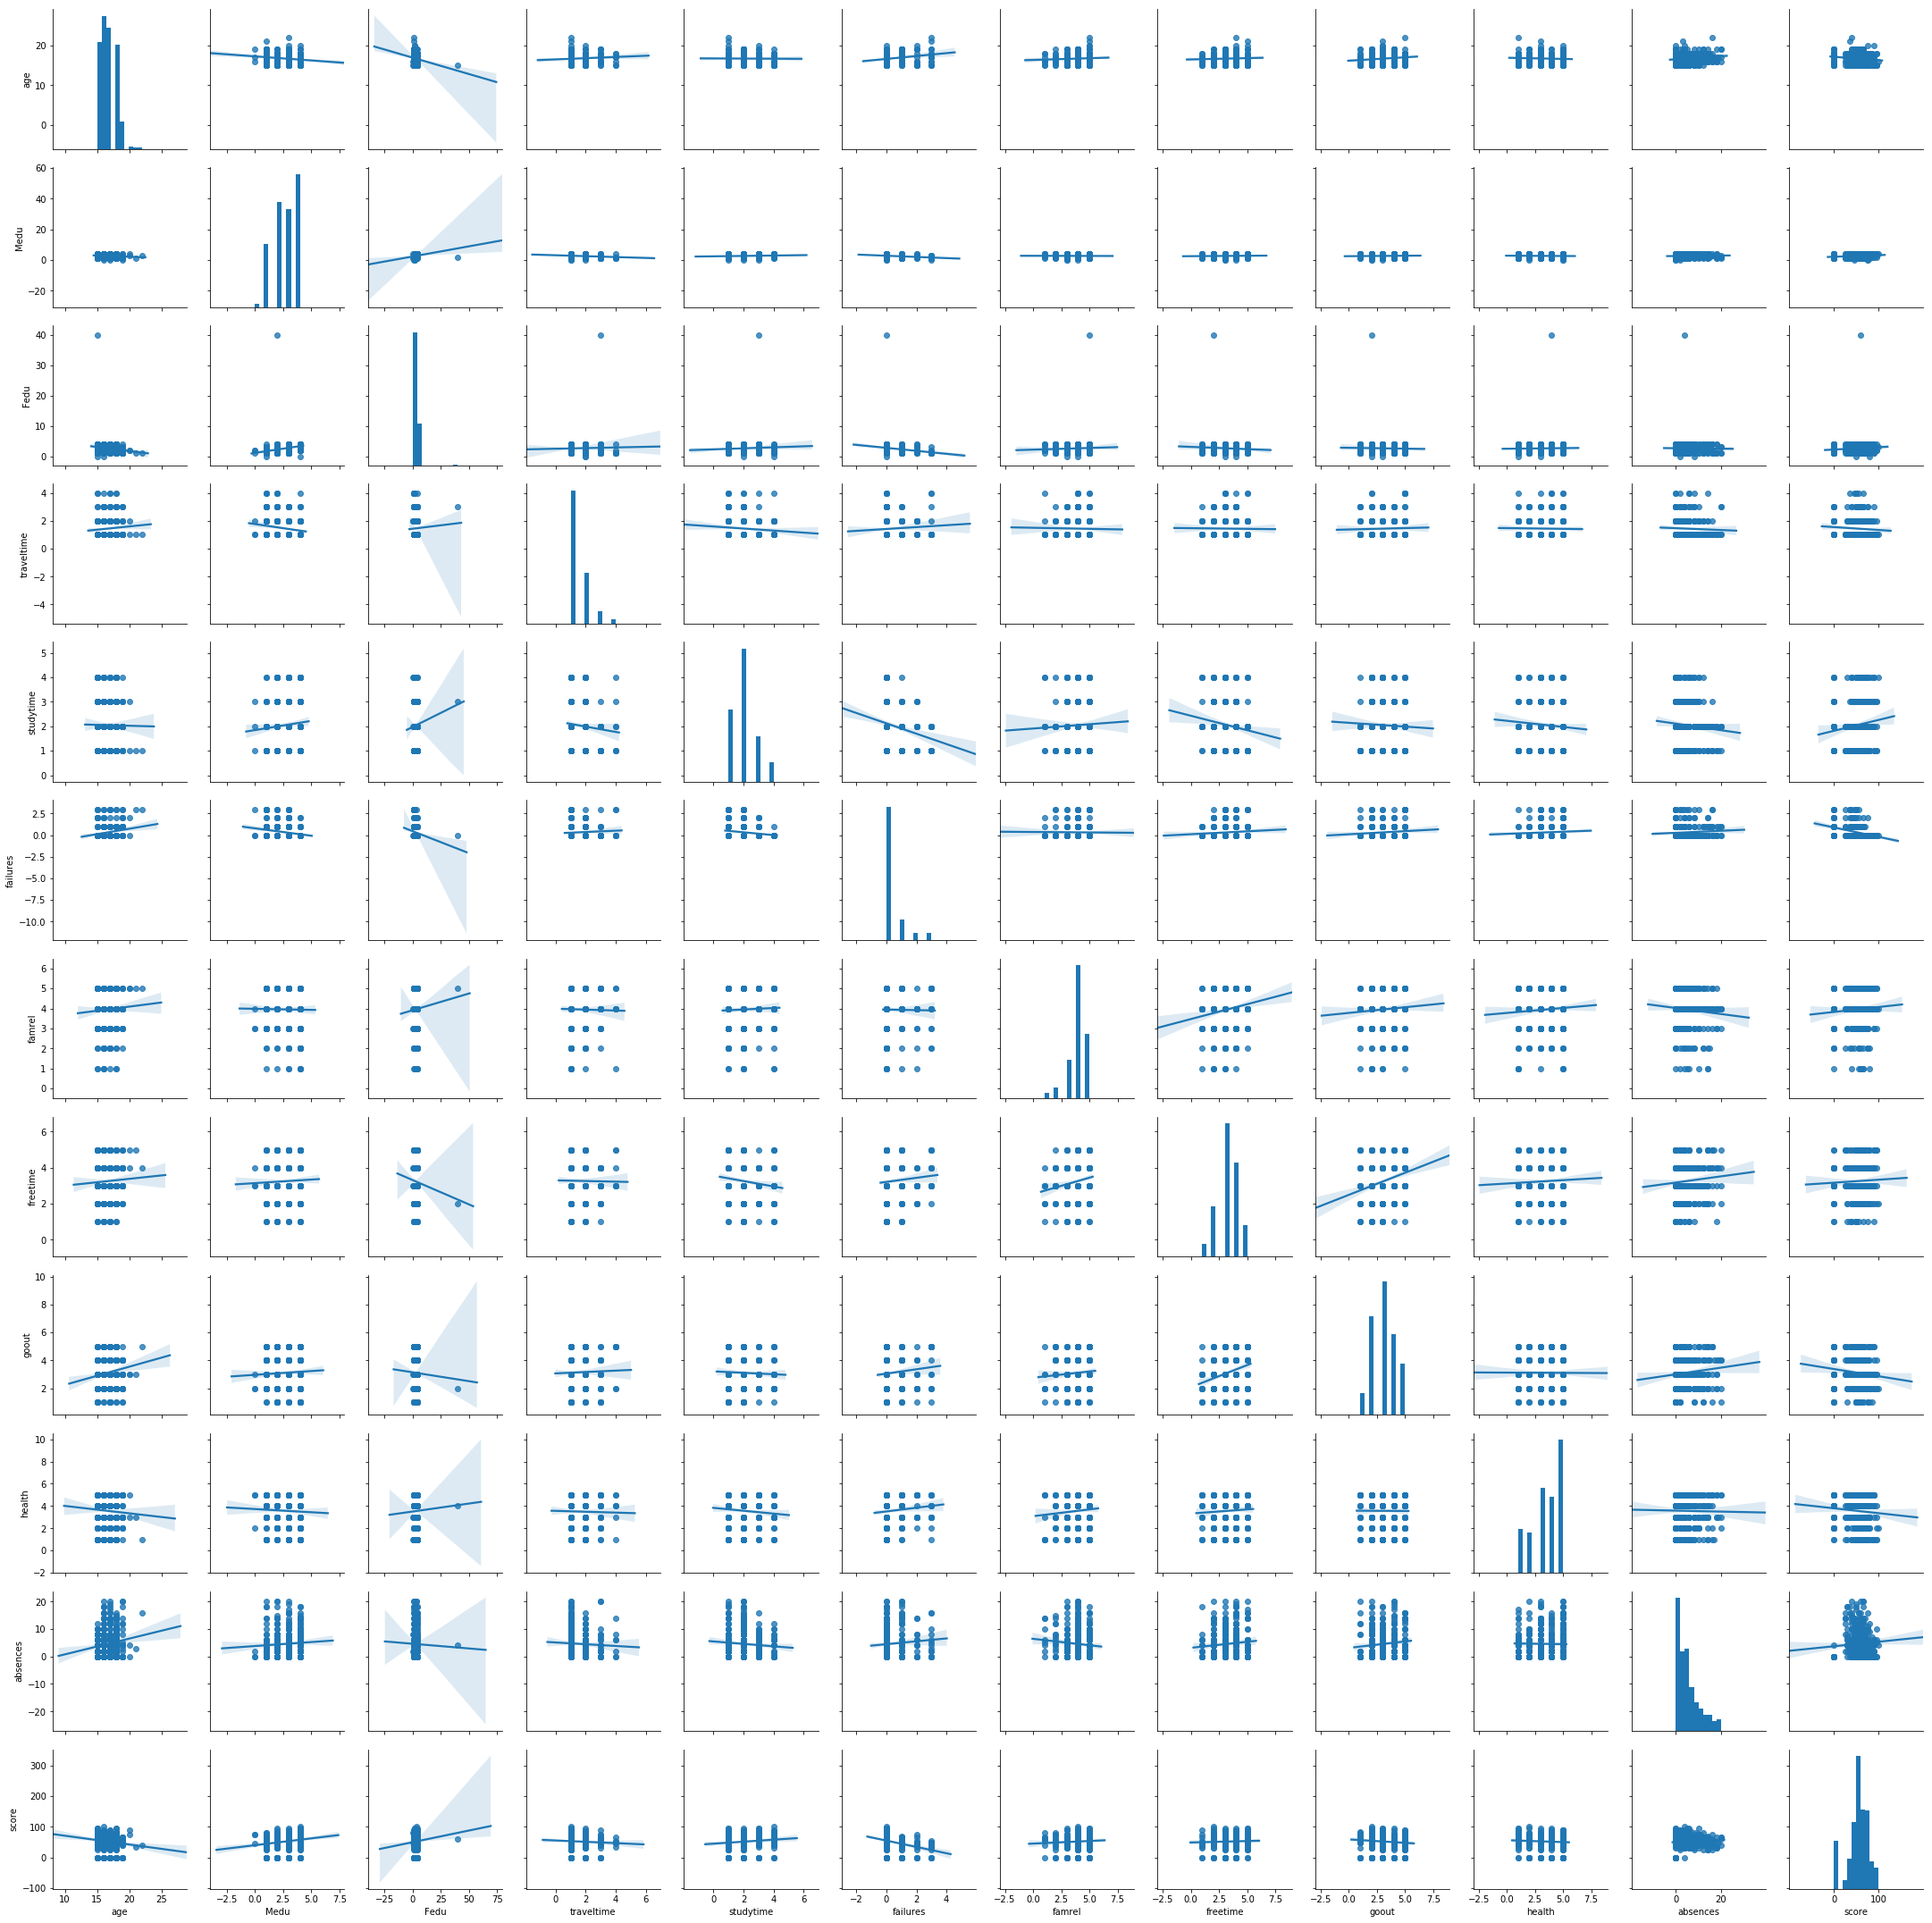

In [122]:
# Building charts to display variables dependency using seaborn pairplot
sns.pairplot(stud_math, kind = 'reg')

In [121]:
# Building correlation table 
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.178986,-0.147103,0.084835,-0.010813,0.213530,0.059692,0.049611,0.149460,-0.061529,0.148437,-0.157974
Medu,-0.178986,1.000000,0.272192,-0.185128,0.097572,-0.256701,-0.013372,0.045092,0.054356,-0.046707,0.065394,0.216355
Fedu,-0.147103,0.272192,1.000000,0.032271,0.061724,-0.157665,0.042836,-0.063224,-0.026385,0.023749,-0.015984,0.076402
traveltime,0.084835,-0.185128,0.032271,1.000000,-0.089509,0.072128,-0.018890,-0.013157,0.031344,-0.020217,-0.045805,-0.067093
studytime,-0.010813,0.097572,0.061724,-0.089509,1.000000,-0.185313,0.035762,-0.132939,-0.039814,-0.080412,-0.076784,0.120673
failures,0.213530,-0.256701,-0.157665,0.072128,-0.185313,1.000000,-0.012260,0.087249,0.105941,0.089927,0.078313,-0.336510
famrel,0.059692,-0.013372,0.042836,-0.018890,0.035762,-0.012260,1.000000,0.164375,0.071360,0.078062,-0.083344,0.064961
freetime,0.049611,0.045092,-0.063224,-0.013157,-0.132939,0.087249,0.164375,1.000000,0.279047,0.052624,0.086623,0.039375
goout,0.149460,0.054356,-0.026385,0.031344,-0.039814,0.105941,0.071360,0.279047,1.000000,-0.004674,0.105943,-0.108130
health,-0.061529,-0.046707,0.023749,-0.020217,-0.080412,0.089927,0.078062,0.052624,-0.004674,1.000000,-0.015549,-0.074418


As we can see positive correlation stand for Score and the folloing variables - Medu, Fedu, studytime, famrel, freetime and absences.

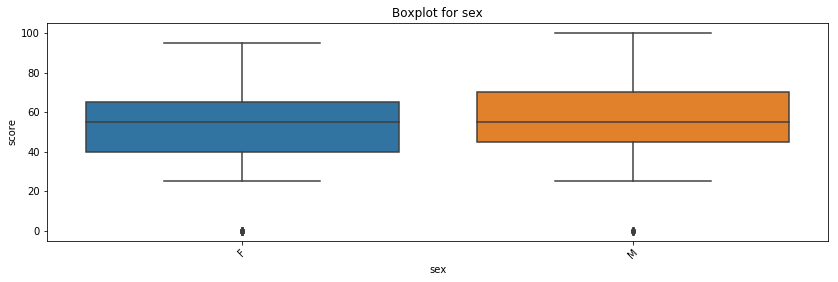

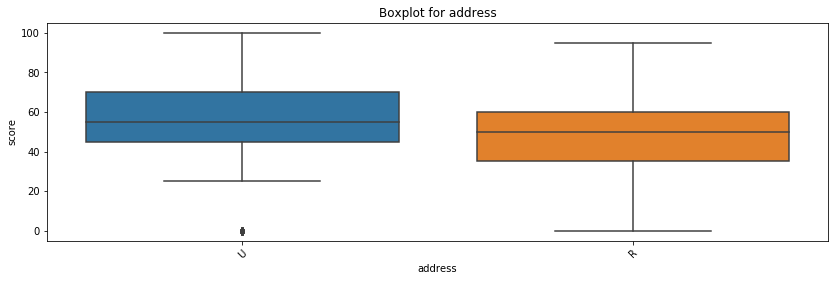

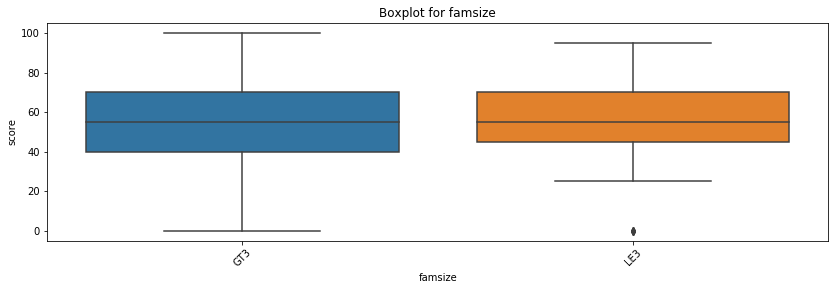

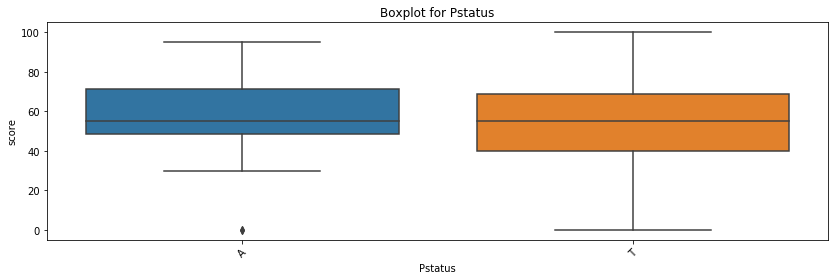

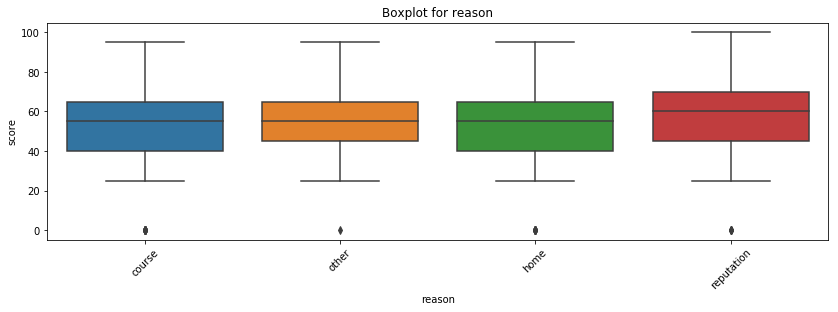

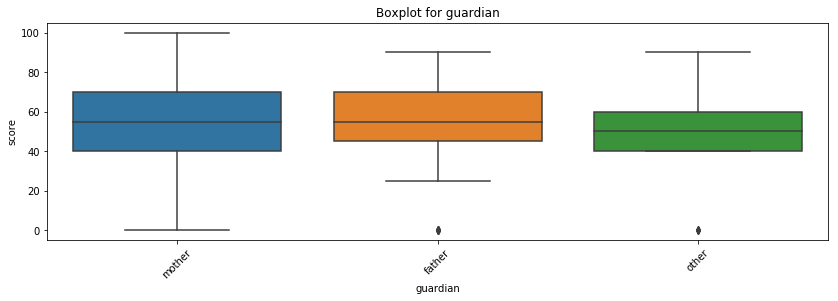

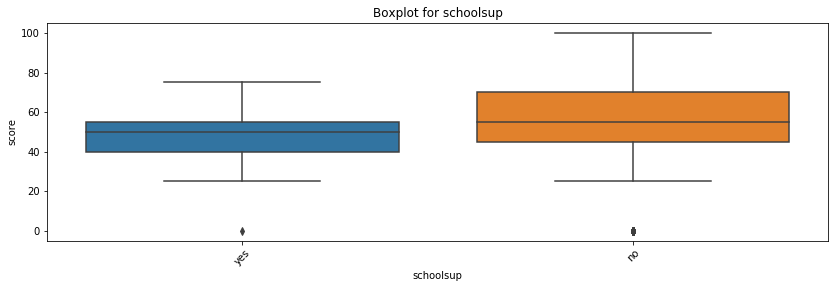

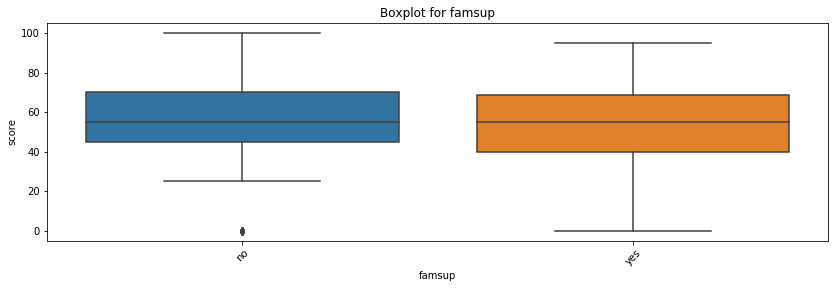

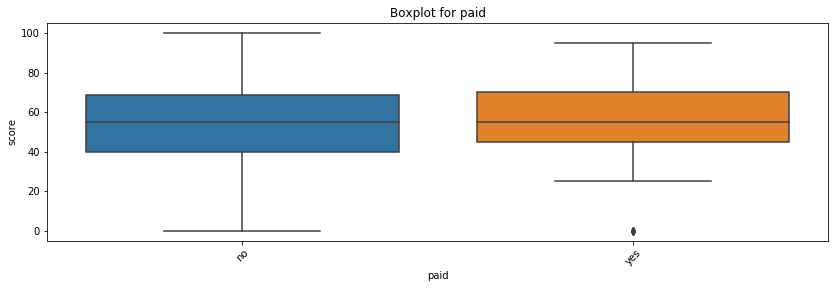

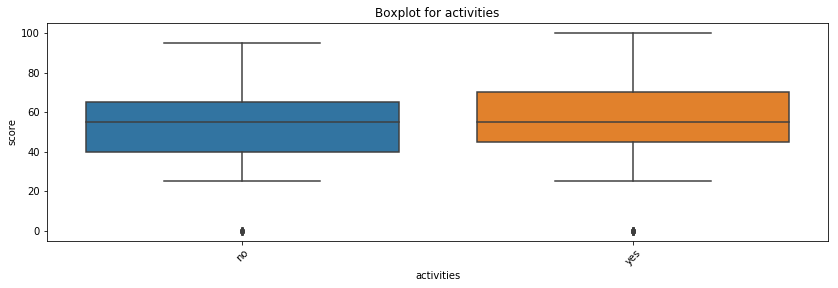

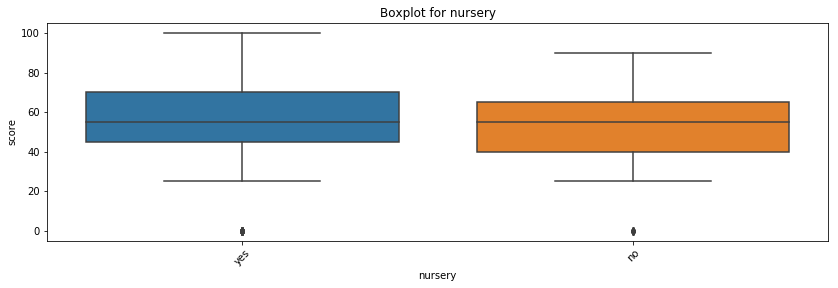

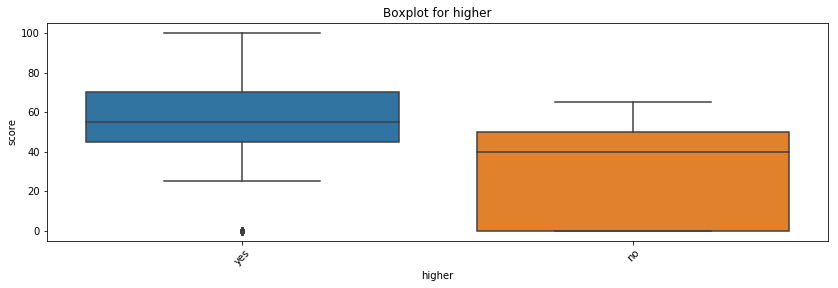

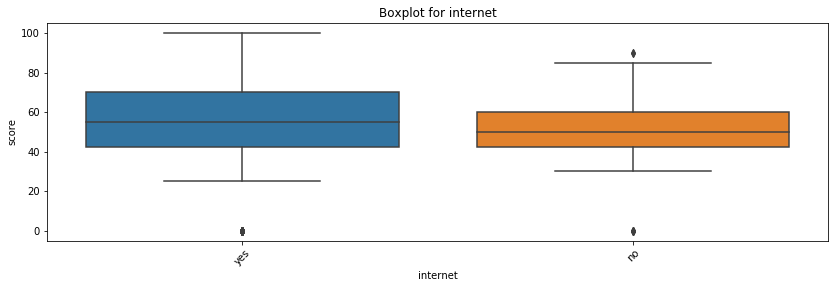

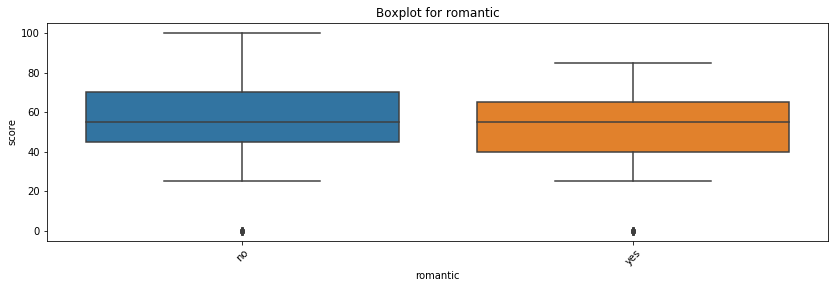

In [126]:
# Building boxplot for nominate columns (for 10 most frequantly appeared)
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [129]:
# Performing Student test for nominate columns(for 10 most frequantly appeared)
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all):
            print('Found statistically important difference for column', column)
            break
for col in ['sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Found statistically important difference for column sex
Found statistically important difference for column address
Found statistically important difference for column paid
Found statistically important difference for column higher
Found statistically important difference for column romantic


In [135]:
# Selecting the nominate and quantitive metrics potencially affecting math Score value.
variables_model = stud_math.loc[:, ['sex', 'address', 'paid', 'higher', 'romantic', 'Medu', 'Fedu', 'studytime', 'famrel', 'freetime', 'absences']]
variables_model.head(5)

,sex,address,paid,higher,romantic,Medu,Fedu,studytime,famrel,freetime,absences
0,F,U,no,yes,no,4.0,4.0,2.0,4.0,3.0,6.0
1,F,U,no,yes,no,1.0,1.0,2.0,5.0,3.0,4.0
2,F,U,NaN,yes,no,1.0,1.0,2.0,4.0,3.0,10.0
3,F,U,yes,yes,yes,4.0,2.0,3.0,3.0,2.0,2.0
4,F,U,yes,yes,no,3.0,3.0,2.0,4.0,3.0,4.0
